In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler, minmax_scale

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

from itertools import cycle
from sklearn.mixture import GaussianMixture

In [2]:
#Objetivo:
# Separar los envíos que se hizo por tarea y por envíos adicionales.


In [3]:
#Objetivo:

# Separar los envíos que se hizo por tarea y por envíos adicionales repitiendo analisis anteriores para ver una posible correlación.



In [4]:
info_estudiantes=pd.read_csv('./datos/informacion_por_estudiante_de_IP.csv')
envios=pd.read_csv('./datos/todos_los_envios.csv')
problemas= pd.read_csv('./datos/todos_problemas.csv')
estudiantes_seccion = pd.read_csv('./datos/todos_estudiantes_seccion.csv')
tareas = pd.read_csv('./datos/todo_tareas.csv')
problemas_tareas= pd.read_csv('./datos/todo_problemas_tareas.csv')
resultado_estudiante= pd.read_csv('./datos/todo_resultado_estudiante.csv')
resultado_tarea= pd.read_csv('./datos/todo_resultados_tareas.csv')
secciones= pd.read_csv('./datos/todo_seccion.csv')

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3135: DtypeWarning: Columns (134) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3135: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
estudiantes_seccion = estudiantes_seccion[['usuario_ptr_id','seccion_id']]
secciones = secciones[['id','nombre_semestre']]
secciones = secciones.rename(columns={"id": "seccion_id"})

In [6]:
problemas = problemas.rename(columns={"id": "problema_id"})
problemas['problema_id'] = problemas['problema_id'].astype(str)
problemas

,problema_id,titulo,curso_id,autor_id,dificultad,estado,funcion,retorno_tipo,publico,nivel,ultima_modificacion,nivel_reto
0,116,Distancia entre dos puntos en la Tierra,1,362,30,NU,calcular_distancia_tierra,float,1,1,2019-09-09 16:00:12.402380,A
1,117,Área de una habitación,1,362,10,NU,area_habitacion,float,1,1,2019-09-09 16:00:21.955652,B
2,118,Eficiencia de combustible,1,362,20,NU,convertir_eficiencia_combustible,float,1,1,2019-09-09 16:00:31.746981,M
3,119,Cambio a retornar,1,362,30,NU,calcular_cambio,str,1,1,2019-09-09 16:00:41.713209,A
4,120,IVA y propina,1,362,10,NU,calcular_iva_propina_total_factura,str,1,1,2019-09-09 16:00:52.293872,B
...,...,...,...,...,...,...,...,...,...,...,...,...
132,267,Dígito divisor,1,437,20,NU,hay_digito_divisor,bool,1,3,2021-09-06 13:30:03.967799,M
133,268,Secuencia factorial,1,437,20,NU,secuencia,str,0,3,2021-09-06 13:30:41.815503,M
134,269,Palabras intercaladas,1,437,10,NU,palabras_intercaladas,str,0,3,2021-09-06 13:31:03.932640,B
135,270,Suma de primos,1,437,10,NU,suma_de_primos,int,0,3,2021-09-06 13:31:24.320885,B


In [7]:
problemas_tareas_estudiante= pd.merge(problemas_tareas,resultado_tarea,on="tarea_id")
problemas_tareas_estudiante=problemas_tareas_estudiante.drop(['id_x','id_y'], axis=1)

In [8]:
tareas = tareas.rename(columns={"id": "tarea_id"})
problemas_tareas_estudiante = pd.merge(problemas_tareas_estudiante,tareas,on='tarea_id')
problemas_tareas_estudiante

,peso,numero_x,problema_id,tarea_id,avance,puntos,estudiante_id,calificacion_tarea,problemas_resueltos,numero_y,fecha_limite,seccion_id,descripcion
0,1,1,168,6.0,100.000000,101,524,100,0,1,2019-09-15 04:50:13.000000,44,Tarea
1,1,1,168,6.0,0.000000,0,532,0,0,1,2019-09-15 04:50:13.000000,44,Tarea
2,1,1,168,6.0,0.000000,0,525,0,0,1,2019-09-15 04:50:13.000000,44,Tarea
3,1,1,168,6.0,0.000000,0,528,0,0,1,2019-09-15 04:50:13.000000,44,Tarea
4,1,1,168,6.0,0.000000,0,530,0,0,1,2019-09-15 04:50:13.000000,44,Tarea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115845,1,3,214,1758.0,33.333333,0,6277,33,1,5,2022-07-30 04:55:00.000000,278,N4 - Tarea 1
115846,1,3,214,1758.0,33.333333,0,6278,33,1,5,2022-07-30 04:55:00.000000,278,N4 - Tarea 1
115847,1,3,214,1758.0,66.666667,0,6279,67,2,5,2022-07-30 04:55:00.000000,278,N4 - Tarea 1
115848,1,3,214,1758.0,0.000000,0,6280,0,0,5,2022-07-30 04:55:00.000000,278,N4 - Tarea 1


In [9]:
problemas_tareas_estudiante.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115850 entries, 0 to 115849
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   peso                 115850 non-null  int64  
 1   numero_x             115850 non-null  int64  
 2   problema_id          115850 non-null  int64  
 3   tarea_id             115850 non-null  float64
 4   avance               115850 non-null  float64
 5   puntos               115850 non-null  int64  
 6   estudiante_id        115850 non-null  int64  
 7   calificacion_tarea   115850 non-null  int64  
 8   problemas_resueltos  115850 non-null  int64  
 9   numero_y             115850 non-null  int64  
 10  fecha_limite         115850 non-null  object 
 11  seccion_id           115850 non-null  int64  
 12  descripcion          115850 non-null  object 
dtypes: float64(2), int64(9), object(2)
memory usage: 12.4+ MB


In [10]:
problemas_tareas_estudiante['problema_id'] = problemas_tareas_estudiante['problema_id'].astype(str)
problemas_tareas_estudiante['seccion_id'] = problemas_tareas_estudiante['seccion_id'].astype(str)
problemas_tareas_estudiante['estudiante_id'] = problemas_tareas_estudiante['estudiante_id'].astype(str)
problemas_tareas_estudiante['pr_sec_id'] =  problemas_tareas_estudiante['estudiante_id'] + problemas_tareas_estudiante['problema_id'] + problemas_tareas_estudiante['seccion_id']

In [11]:
problemas_tareas_estudiante

,peso,numero_x,problema_id,tarea_id,avance,puntos,estudiante_id,calificacion_tarea,problemas_resueltos,numero_y,fecha_limite,seccion_id,descripcion,pr_sec_id
0,1,1,168,6.0,100.000000,101,524,100,0,1,2019-09-15 04:50:13.000000,44,Tarea,52416844
1,1,1,168,6.0,0.000000,0,532,0,0,1,2019-09-15 04:50:13.000000,44,Tarea,53216844
2,1,1,168,6.0,0.000000,0,525,0,0,1,2019-09-15 04:50:13.000000,44,Tarea,52516844
3,1,1,168,6.0,0.000000,0,528,0,0,1,2019-09-15 04:50:13.000000,44,Tarea,52816844
4,1,1,168,6.0,0.000000,0,530,0,0,1,2019-09-15 04:50:13.000000,44,Tarea,53016844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115845,1,3,214,1758.0,33.333333,0,6277,33,1,5,2022-07-30 04:55:00.000000,278,N4 - Tarea 1,6277214278
115846,1,3,214,1758.0,33.333333,0,6278,33,1,5,2022-07-30 04:55:00.000000,278,N4 - Tarea 1,6278214278
115847,1,3,214,1758.0,66.666667,0,6279,67,2,5,2022-07-30 04:55:00.000000,278,N4 - Tarea 1,6279214278
115848,1,3,214,1758.0,0.000000,0,6280,0,0,5,2022-07-30 04:55:00.000000,278,N4 - Tarea 1,6280214278


In [12]:
info_estudiantes_det= info_estudiantes[['id','programa','generacion_e','riesgo_deca','tipo_riesgo_deca','spadies','n1_global','n2_global','n3_global','n4_global','n1_practico','n2_practico','n3_practico','n4_practico','n1_teorico','n2_teorico','n3_teorico','n4_teorico','n1_ejercicio','n2_ejercicio','n3_ejercicio','n4_ejercicio','retiro','semestre','definitiva_profesor']]
# info_estudiantes_det= info_estudiantes[['id','n1_global','n2_global','n3_global','n4_global','retiro','semestre','nivel','programa']]
info_estudiantes_det= info_estudiantes_det[(info_estudiantes_det['n1_global']>=0) & (info_estudiantes_det['n1_global']<6) & (info_estudiantes_det['n2_global']>=0)  & (info_estudiantes_det['n2_global']<6) & (info_estudiantes_det['n3_global']>=0) & (info_estudiantes_det['n3_global']<6) & (info_estudiantes_det['n4_global']>=0) & (info_estudiantes_det['n4_global']<6) ]
info_estudiantes_det= info_estudiantes_det[(info_estudiantes_det['n1_global']>0) |  (info_estudiantes_det['n2_global']>0) | (info_estudiantes_det['n3_global']>0) | (info_estudiantes_det['n4_global']>0)]
info_estudiantes_det = info_estudiantes_det.rename(columns={"id": "estudiante_id"})

In [13]:
estudiantes_seccion = estudiantes_seccion.rename(columns={"usuario_ptr_id": "estudiante_id"})

info_estudiantes_det = pd.merge(info_estudiantes_det,estudiantes_seccion,on='estudiante_id')

info_estudiantes_det['estudiante_id'] = info_estudiantes_det['estudiante_id'].astype(str)
info_estudiantes_det['semestre'] = info_estudiantes_det['semestre'].astype(str)

info_estudiantes_det['est_sem_id'] =  info_estudiantes_det['estudiante_id'] + info_estudiantes_det['semestre'] 

info_estudiantes_det = info_estudiantes_det[ (info_estudiantes_det['seccion_id'].isnull())==False]
info_estudiantes_det['retiro'].fillna(value="NR", inplace=True)
info_estudiantes_det

,estudiante_id,programa,generacion_e,riesgo_deca,tipo_riesgo_deca,spadies,n1_global,n2_global,n3_global,n4_global,...,n4_teorico,n1_ejercicio,n2_ejercicio,n3_ejercicio,n4_ejercicio,retiro,semestre,definitiva_profesor,seccion_id,est_sem_id
0,867,INGENIERIA BIOMEDICA,0,0.0,NaN,NaN,2.19,2.89,3.350000,3.97,...,3.85,4.45,3.05,4.76,4.31,NR,202010,3.31,54.0,867202010
1,910,FISICA,0,1.0,PRIM,5.0,4.57,4.92,4.460000,3.71,...,5.00,4.69,5.00,5.00,4.25,NR,202010,4.36,56.0,910202010
2,1186,ING. DE SISTEMAS Y COMPUTACION,0,1.0,PRIM,1.0,3.67,4.08,4.320000,3.44,...,3.00,4.97,4.34,4.21,4.04,NR,202010,3.93,66.0,1186202010
3,1394,MICROBIOLOGIA,0,1.0,PRIM,4.0,4.58,4.31,4.190000,4.37,...,4.75,5.00,4.54,4.56,3.93,NR,202010,4.32,74.0,1394202010
4,1436,INGENIERIA MECANICA,0,0.0,NaN,NaN,4.94,4.70,3.680000,2.65,...,3.10,5.00,4.29,3.00,0.80,NR,202010,3.84,76.0,1436202010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,5286,INGENIERIA MECANICA,0,NaN,NaN,NaN,4.30,4.52,5.000000,0.00,...,0.00,5.00,4.90,5.00,0.00,NR,202210,0.00,238.0,5286202210
6815,5709,INGENIERIA INDUSTRIAL,0,NaN,NaN,NaN,4.70,3.48,4.800000,0.00,...,0.00,4.91,4.70,4.50,0.00,NR,202210,0.00,255.0,5709202210
6816,5865,ING. DE SISTEMAS Y COMPUTACION,0,NaN,NaN,NaN,4.60,2.92,3.942857,0.00,...,0.00,5.00,4.58,4.41,0.00,NR,202210,0.00,261.0,5865202210
6817,5996,MICROBIOLOGIA,0,NaN,NaN,NaN,4.70,4.72,4.314286,0.00,...,0.00,4.94,4.89,4.38,0.00,NR,202210,0.00,267.0,5996202210


In [14]:
info_estudiantes_det['semestre'].unique()

array(['202010', '202020', '202120', '202110', '202210', '201920',
       '202219', '202119', '201910'], dtype=object)

In [15]:
def conseguir_anio(texto):
    return (texto.split()[0]).split("-")[0]
def conseguir_mes(texto):
    return (texto.split()[0]).split("-")[1]
def conseguir_dia(texto):
    return (texto.split()[0]).split("-")[2]

In [16]:
envios['Anio'] = (envios['timestamp'].apply(conseguir_anio))
envios['Mes'] = (envios['timestamp'].apply(conseguir_mes))
envios['Dia'] = (envios['timestamp'].apply(conseguir_dia))
envios['Anio'] = envios['Anio'].astype(int)
envios['Mes'] = envios['Mes'].astype(int)
envios['Dia'] = envios['Dia'].astype(int)

In [17]:
envios['semestre'] = np.where((envios['Anio']==2022) & (envios['Mes']<6) & (envios['Mes']>=1),"202210",
                     np.where((envios['Anio']==2021) & (envios['Mes']<=12) & (envios['Mes']>=8),"202120",
                     np.where((envios['Anio']==2021) & (envios['Mes']<6) & (envios['Mes']>=1),"202110",
                     np.where((envios['Anio']==2020) & (envios['Mes']<=12) & (envios['Mes']>=8),"202020",
                     np.where((envios['Anio']==2020) & (envios['Mes']<6) & (envios['Mes']>=1),"202010",
                     np.where((envios['Anio']==2019) & (envios['Mes']<=12) & (envios['Mes']>=8),"201920",
                     np.where((envios['Anio']==2019)  & (envios['Mes']<6) & (envios['Mes']>=1),"201910",
                              
                     np.where((envios['Anio']==2021)  & (envios['Mes']<8) & (envios['Mes']>=6),"202119",
                     np.where((envios['Anio']==2020)  & (envios['Mes']<8) & (envios['Mes']>=6),"202019",
                     np.where((envios['Anio']==2022)  & (envios['Mes']<=8) & (envios['Mes']>=6),"202219","No match date"))))))))))

In [18]:
envios=envios.dropna()

In [19]:
envios['semestre'].unique()

array(['201920', '202010', '202019', '202020', '202110', '202119',
       '202120', '202210', '202219'], dtype=object)

In [20]:
envios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300411 entries, 0 to 300412
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       300411 non-null  int64  
 1   numero                   300411 non-null  int64  
 2   timestamp                300411 non-null  object 
 3   avance                   300411 non-null  int64  
 4   estudiante_id            300411 non-null  int64  
 5   problema_id              300411 non-null  float64
 6   resultado_estudiante_id  300411 non-null  int64  
 7   estado                   300411 non-null  object 
 8   Anio                     300411 non-null  int32  
 9   Mes                      300411 non-null  int32  
 10  Dia                      300411 non-null  int32  
 11  semestre                 300411 non-null  object 
dtypes: float64(1), int32(3), int64(5), object(3)
memory usage: 26.4+ MB


In [21]:
envios_mod= envios.copy()

In [22]:
envios_mod['estudiante_id'] = envios_mod['estudiante_id'].astype(str)
envios_mod['semestre'] = envios_mod['semestre'].astype(str)

envios_mod['est_sem_id'] =  envios_mod['estudiante_id'] + envios_mod['semestre'] 

In [23]:
envios_mod

,id,numero,timestamp,avance,estudiante_id,problema_id,resultado_estudiante_id,estado,Anio,Mes,Dia,semestre,est_sem_id
0,179,1,2019-09-09 16:47:13.610937,100,524,117.0,65,OK,2019,9,9,201920,524201920
1,180,1,2019-09-09 17:20:15.109540,100,526,117.0,66,OK,2019,9,9,201920,526201920
2,181,1,2019-09-09 17:28:32.380640,100,525,152.0,67,OK,2019,9,9,201920,525201920
3,182,1,2019-09-09 17:31:04.890352,0,525,149.0,68,ER,2019,9,9,201920,525201920
4,183,1,2019-09-09 17:32:11.534749,100,525,150.0,69,OK,2019,9,9,201920,525201920
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300408,300595,1,2022-08-06 14:24:57.239117,100,5906,154.0,135627,OK,2022,8,6,202219,5906202219
300409,300596,1,2022-08-06 14:56:34.644659,30,5906,157.0,135628,ER,2022,8,6,202219,5906202219
300410,300597,2,2022-08-06 15:02:20.309052,50,5906,157.0,135628,ER,2022,8,6,202219,5906202219
300411,300598,3,2022-08-06 15:08:44.696018,100,5906,157.0,135628,OK,2022,8,6,202219,5906202219


In [24]:
envios_demas_y_portarea_mod=(envios_mod[['estudiante_id','problema_id','estado','semestre','est_sem_id']].groupby(['est_sem_id','problema_id']).count())
envios_demas_y_portarea_mod = envios_demas_y_portarea_mod['estado'].reset_index()
envios_demas_y_portarea_mod = envios_demas_y_portarea_mod.rename(columns={"estado": "Num_envio"})
envios_demas_y_portarea_mod

,est_sem_id,problema_id,Num_envio
0,1000202010,129.0,6
1,1000202010,132.0,1
2,1000202010,135.0,12
3,1000202010,138.0,1
4,1000202010,140.0,2
...,...,...,...
100931,999202019,211.0,1
100932,999202019,213.0,1
100933,999202019,215.0,2
100934,999202019,217.0,1


In [25]:
envios_demas_y_portarea_mod = pd.merge(envios_demas_y_portarea_mod,info_estudiantes_det,on='est_sem_id')

In [26]:
envios_demas_y_portarea_mod

,est_sem_id,problema_id,Num_envio,estudiante_id,programa,generacion_e,riesgo_deca,tipo_riesgo_deca,spadies,n1_global,...,n3_teorico,n4_teorico,n1_ejercicio,n2_ejercicio,n3_ejercicio,n4_ejercicio,retiro,semestre,definitiva_profesor,seccion_id
0,1003202110,117.0,1,1003,ADMINISTRACION DE EMPRESAS,0,0.0,NaN,NaN,5.07,...,4.3,5.05,5.0,4.7,5.0,4.95,NR,202110,4.74,59.0
1,1003202110,120.0,5,1003,ADMINISTRACION DE EMPRESAS,0,0.0,NaN,NaN,5.07,...,4.3,5.05,5.0,4.7,5.0,4.95,NR,202110,4.74,59.0
2,1003202110,123.0,1,1003,ADMINISTRACION DE EMPRESAS,0,0.0,NaN,NaN,5.07,...,4.3,5.05,5.0,4.7,5.0,4.95,NR,202110,4.74,59.0
3,1003202110,126.0,2,1003,ADMINISTRACION DE EMPRESAS,0,0.0,NaN,NaN,5.07,...,4.3,5.05,5.0,4.7,5.0,4.95,NR,202110,4.74,59.0
4,1003202110,127.0,5,1003,ADMINISTRACION DE EMPRESAS,0,0.0,NaN,NaN,5.07,...,4.3,5.05,5.0,4.7,5.0,4.95,NR,202110,4.74,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84380,983202010,171.0,1,983,ING. DE SISTEMAS Y COMPUTACION,0,1.0,PRIM,3.0,4.55,...,3.0,4.05,5.0,4.1,-1.0,4.92,NR,202010,3.69,58.0
84381,983202010,173.0,2,983,ING. DE SISTEMAS Y COMPUTACION,0,1.0,PRIM,3.0,4.55,...,3.0,4.05,5.0,4.1,-1.0,4.92,NR,202010,3.69,58.0
84382,983202010,178.0,2,983,ING. DE SISTEMAS Y COMPUTACION,0,1.0,PRIM,3.0,4.55,...,3.0,4.05,5.0,4.1,-1.0,4.92,NR,202010,3.69,58.0
84383,983202010,181.0,1,983,ING. DE SISTEMAS Y COMPUTACION,0,1.0,PRIM,3.0,4.55,...,3.0,4.05,5.0,4.1,-1.0,4.92,NR,202010,3.69,58.0


In [27]:
envios_demas_y_portarea_mod['estudiante_id'] = envios_demas_y_portarea_mod['estudiante_id'].astype(int)
envios_demas_y_portarea_mod['problema_id'] = envios_demas_y_portarea_mod['problema_id'].astype(int)
envios_demas_y_portarea_mod['seccion_id'] = envios_demas_y_portarea_mod['seccion_id'].astype(int)
envios_demas_y_portarea_mod['estudiante_id'] = envios_demas_y_portarea_mod['estudiante_id'].astype(str)
envios_demas_y_portarea_mod['problema_id'] = envios_demas_y_portarea_mod['problema_id'].astype(str)
envios_demas_y_portarea_mod['seccion_id'] = envios_demas_y_portarea_mod['seccion_id'].astype(str)
envios_demas_y_portarea_mod['pr_sec_id'] = envios_demas_y_portarea_mod['estudiante_id'] + envios_demas_y_portarea_mod['problema_id'] + envios_demas_y_portarea_mod['seccion_id']

# -----------------------------

In [28]:
envios_demas_y_portarea=(envios[['estudiante_id','problema_id','estado']].groupby(['estudiante_id','problema_id']).count())
envios_demas_y_portarea = envios_demas_y_portarea['estado'].reset_index()
envios_demas_y_portarea = envios_demas_y_portarea.rename(columns={"estado": "Num_envio"})
envios_demas_y_portarea['estudiante_id'] = envios_demas_y_portarea['estudiante_id'].astype(str)
envios_demas_y_portarea

,estudiante_id,problema_id,Num_envio
0,363,117.0,5
1,363,120.0,2
2,363,123.0,1
3,363,141.0,3
4,363,162.0,2
...,...,...,...
100403,6305,122.0,2
100404,6305,128.0,3
100405,6305,161.0,5
100406,6305,236.0,2


In [29]:
envios_demas_y_portarea = pd.merge(envios_demas_y_portarea,info_estudiantes_det,on='estudiante_id')

In [30]:
envios_demas_y_portarea['estudiante_id'] = envios_demas_y_portarea['estudiante_id'].astype(str)
envios_demas_y_portarea['problema_id'] = envios_demas_y_portarea['problema_id'].astype(str)
envios_demas_y_portarea['seccion_id'] = envios_demas_y_portarea['seccion_id'].astype(str)
envios_demas_y_portarea['pr_sec_id'] = envios_demas_y_portarea['estudiante_id'] + envios_demas_y_portarea['problema_id'] + envios_demas_y_portarea['seccion_id']

In [31]:
envios_demas_y_portarea

,estudiante_id,problema_id,Num_envio,programa,generacion_e,riesgo_deca,tipo_riesgo_deca,spadies,n1_global,n2_global,...,n1_ejercicio,n2_ejercicio,n3_ejercicio,n4_ejercicio,retiro,semestre,definitiva_profesor,seccion_id,est_sem_id,pr_sec_id
0,363,117.0,5,INGENIERÍA CIVIL,0,0.0,NaN,NaN,4.795,3.986,...,5.00,4.65,5.0,0.0,NR,201920,0.0,38.0,363201920,363117.038.0
1,363,120.0,2,INGENIERÍA CIVIL,0,0.0,NaN,NaN,4.795,3.986,...,5.00,4.65,5.0,0.0,NR,201920,0.0,38.0,363201920,363120.038.0
2,363,123.0,1,INGENIERÍA CIVIL,0,0.0,NaN,NaN,4.795,3.986,...,5.00,4.65,5.0,0.0,NR,201920,0.0,38.0,363201920,363123.038.0
3,363,141.0,3,INGENIERÍA CIVIL,0,0.0,NaN,NaN,4.795,3.986,...,5.00,4.65,5.0,0.0,NR,201920,0.0,38.0,363201920,363141.038.0
4,363,162.0,2,INGENIERÍA CIVIL,0,0.0,NaN,NaN,4.795,3.986,...,5.00,4.65,5.0,0.0,NR,201920,0.0,38.0,363201920,363162.038.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112787,6305,161.0,5,ING. DE SISTEMAS Y COMPUTACION,0,NaN,NaN,NaN,1.000,0.800,...,4.58,-1.00,0.0,0.0,NR,202210,0.0,279.0,6305202210,6305161.0279.0
112788,6305,236.0,2,NaN,0,NaN,NaN,NaN,0.100,0.000,...,-1.00,0.00,0.0,0.0,NR,202219,0.0,279.0,6305202219,6305236.0279.0
112789,6305,236.0,2,ING. DE SISTEMAS Y COMPUTACION,0,NaN,NaN,NaN,1.000,0.800,...,4.58,-1.00,0.0,0.0,NR,202210,0.0,279.0,6305202210,6305236.0279.0
112790,6305,258.0,1,NaN,0,NaN,NaN,NaN,0.100,0.000,...,-1.00,0.00,0.0,0.0,NR,202219,0.0,279.0,6305202219,6305258.0279.0


# -------------------------------

In [32]:
problemas_tareas_estudiante_sin_ids=problemas_tareas_estudiante.drop(['problema_id','seccion_id','estudiante_id'], axis=1)
df_final = pd.merge(envios_demas_y_portarea_mod,problemas_tareas_estudiante_sin_ids,on='pr_sec_id',how='left')

In [33]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86014 entries, 0 to 86013
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   est_sem_id           86014 non-null  object 
 1   problema_id          86014 non-null  object 
 2   Num_envio            86014 non-null  int64  
 3   estudiante_id        86014 non-null  object 
 4   programa             85498 non-null  object 
 5   generacion_e         86014 non-null  int64  
 6   riesgo_deca          53708 non-null  float64
 7   tipo_riesgo_deca     25562 non-null  object 
 8   spadies              25555 non-null  float64
 9   n1_global            86014 non-null  float64
 10  n2_global            86014 non-null  float64
 11  n3_global            86014 non-null  float64
 12  n4_global            86014 non-null  float64
 13  n1_practico          86014 non-null  float64
 14  n2_practico          86014 non-null  float64
 15  n3_practico          86014 non-null 

In [34]:
df_final['tarea_id'].fillna(value=-1.0, inplace=True)

In [35]:
df_final['Asoc_tarea'] = np.where(df_final['tarea_id']!= -1.0,1,0) # 1 = Es Tarea, 0= No es Tarea 

In [36]:
df_final = pd.merge(df_final,problemas , on="problema_id")
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86014 entries, 0 to 86013
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   est_sem_id           86014 non-null  object 
 1   problema_id          86014 non-null  object 
 2   Num_envio            86014 non-null  int64  
 3   estudiante_id        86014 non-null  object 
 4   programa             85498 non-null  object 
 5   generacion_e         86014 non-null  int64  
 6   riesgo_deca          53708 non-null  float64
 7   tipo_riesgo_deca     25562 non-null  object 
 8   spadies              25555 non-null  float64
 9   n1_global            86014 non-null  float64
 10  n2_global            86014 non-null  float64
 11  n3_global            86014 non-null  float64
 12  n4_global            86014 non-null  float64
 13  n1_practico          86014 non-null  float64
 14  n2_practico          86014 non-null  float64
 15  n3_practico          86014 non-null 

In [37]:
df_conteo_sino_tarea=df_final.groupby(['est_sem_id','nivel','Asoc_tarea']).sum()['Num_envio']
df_conteo_sino_tarea= df_conteo_sino_tarea.reset_index()
df_conteo_sino_tarea

,est_sem_id,nivel,Asoc_tarea,Num_envio
0,1003202110,1,0,17
1,1003202110,1,1,1
2,1003202110,2,0,4
3,1003202110,3,0,5
4,1009202010,1,1,14
...,...,...,...,...
17971,982202010,3,1,12
17972,982202010,4,0,4
17973,983202010,1,1,7
17974,983202010,2,1,17


In [38]:
df_analisis = pd.merge(df_conteo_sino_tarea,info_estudiantes_det,on='est_sem_id')

In [39]:
df_analisis[df_analisis['estudiante_id']=="981"]

,est_sem_id,nivel,Asoc_tarea,Num_envio,estudiante_id,programa,generacion_e,riesgo_deca,tipo_riesgo_deca,spadies,...,n3_teorico,n4_teorico,n1_ejercicio,n2_ejercicio,n3_ejercicio,n4_ejercicio,retiro,semestre,definitiva_profesor,seccion_id
17966,981202010,1,1,3,981,ING. DE SISTEMAS Y COMPUTACION,1,0.0,NaN,NaN,...,0.0,0.0,4.75,4.61,0.0,0.0,R,202010,0.75,58.0
17967,981202010,2,1,5,981,ING. DE SISTEMAS Y COMPUTACION,1,0.0,NaN,NaN,...,0.0,0.0,4.75,4.61,0.0,0.0,R,202010,0.75,58.0


In [40]:
df_analisis

,est_sem_id,nivel,Asoc_tarea,Num_envio,estudiante_id,programa,generacion_e,riesgo_deca,tipo_riesgo_deca,spadies,...,n3_teorico,n4_teorico,n1_ejercicio,n2_ejercicio,n3_ejercicio,n4_ejercicio,retiro,semestre,definitiva_profesor,seccion_id
0,1003202110,1,0,17,1003,ADMINISTRACION DE EMPRESAS,0,0.0,NaN,NaN,...,4.30,5.05,5.0,4.70,5.00,4.95,NR,202110,4.74,59.0
1,1003202110,1,1,1,1003,ADMINISTRACION DE EMPRESAS,0,0.0,NaN,NaN,...,4.30,5.05,5.0,4.70,5.00,4.95,NR,202110,4.74,59.0
2,1003202110,2,0,4,1003,ADMINISTRACION DE EMPRESAS,0,0.0,NaN,NaN,...,4.30,5.05,5.0,4.70,5.00,4.95,NR,202110,4.74,59.0
3,1003202110,3,0,5,1003,ADMINISTRACION DE EMPRESAS,0,0.0,NaN,NaN,...,4.30,5.05,5.0,4.70,5.00,4.95,NR,202110,4.74,59.0
4,1009202010,1,1,14,1009,INGENIERIA INDUSTRIAL,0,1.0,PRIM,5.0,...,3.75,3.65,5.0,3.09,4.75,4.96,NR,202010,3.72,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,982202010,3,1,12,982,FISICA,0,1.0,PRIM,5.0,...,4.55,4.15,4.9,3.45,-1.00,4.72,NR,202010,4.34,58.0
17972,982202010,4,0,4,982,FISICA,0,1.0,PRIM,5.0,...,4.55,4.15,4.9,3.45,-1.00,4.72,NR,202010,4.34,58.0
17973,983202010,1,1,7,983,ING. DE SISTEMAS Y COMPUTACION,0,1.0,PRIM,3.0,...,3.00,4.05,5.0,4.10,-1.00,4.92,NR,202010,3.69,58.0
17974,983202010,2,1,17,983,ING. DE SISTEMAS Y COMPUTACION,0,1.0,PRIM,3.0,...,3.00,4.05,5.0,4.10,-1.00,4.92,NR,202010,3.69,58.0


# Analisis Coorrelación y descripción de la información

<AxesSubplot:>

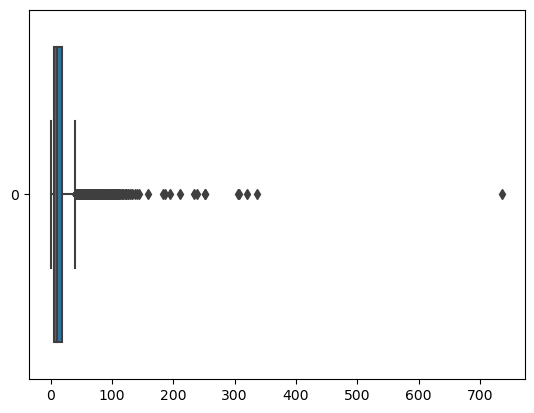

In [41]:
sns.boxplot(data=df_analisis['Num_envio'], orient="h")

In [42]:
# Seleccionamos los no Outliers usando percentiles
per = 95

# Depuración de las anomalías en las columnas.
num_envios = (df_analisis['Num_envio'] < np.percentile(df_analisis['Num_envio'] , per))

In [43]:
df_analisis= df_analisis[num_envios].copy()

<AxesSubplot:>

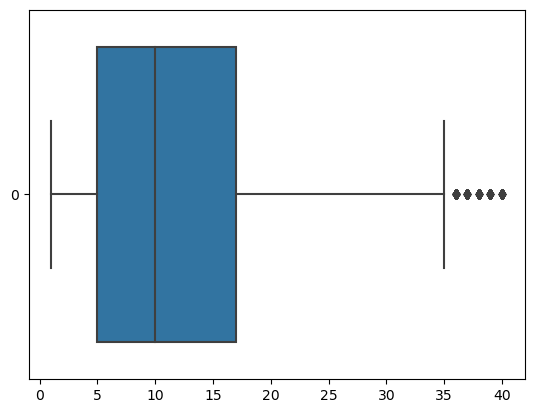

In [44]:
sns.boxplot(data=df_analisis['Num_envio'], orient="h")

<AxesSubplot:>

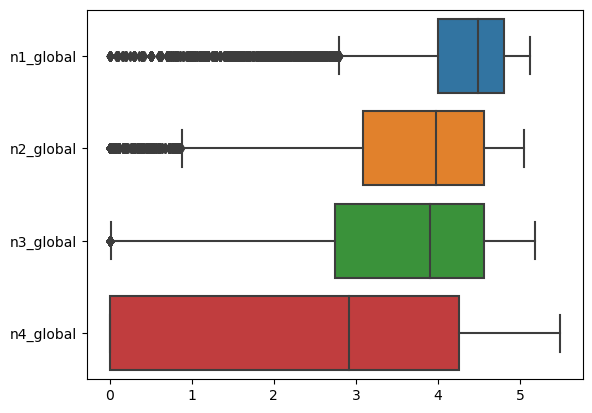

In [45]:
sns.boxplot(data=df_analisis[['n1_global','n2_global','n3_global','n4_global']], orient="h")

In [46]:
per_b = 5
n1_global_no_out= (df_analisis['n1_global'] > np.percentile(df_analisis['n1_global'] , per_b))

In [47]:
df_analisis= df_analisis[n1_global_no_out].copy()

<AxesSubplot:>

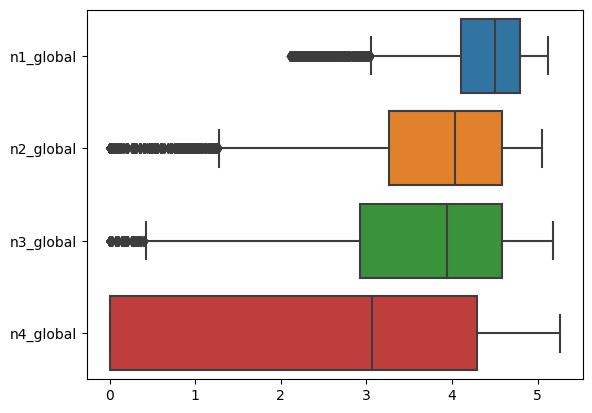

In [48]:
sns.boxplot(data=df_analisis[['n1_global','n2_global','n3_global','n4_global']], orient="h")

In [49]:
df_analisis['retiroOno'] = np.where((df_analisis['retiro']=='NR'),1,0)

In [50]:
columnas=['Num_envio','Asoc_tarea','n1_global','n2_global','n3_global','n4_global','retiroOno']
# df_envio_no_tareas= (df_analisis[(df_analisis['Asoc_tarea']==0) ])
# df_envio_tareas= (df_analisis[(df_analisis['Asoc_tarea']==1) ])
# corr_df_general= df_analisis.corr(method='pearson')
# corr_df_no_tareas = df_envio_no_tareas[columnas].corr(method='pearson')
# corr_df_tareas =df_envio_tareas[columnas].corr(method='pearson')

df_nivel1= df_analisis[(df_analisis['nivel']==1) & (df_analisis['Asoc_tarea']==1)]
df_nivel2= df_analisis[(df_analisis['nivel']==2) & (df_analisis['Asoc_tarea']==1)]
df_nivel3= df_analisis[(df_analisis['nivel']==3) & (df_analisis['Asoc_tarea']==1)]
df_nivel4=df_analisis[(df_analisis['nivel']==4) & (df_analisis['Asoc_tarea']==1)]
corr_df1= df_nivel1[['Num_envio','n1_global']].corr(method='pearson')
corr_df2= df_nivel2[['Num_envio','n2_global']].corr(method='pearson')
corr_df3= df_nivel3[['Num_envio','n3_global']].corr(method='pearson')
corr_df4= df_nivel4[['Num_envio','n4_global']].corr(method='pearson')

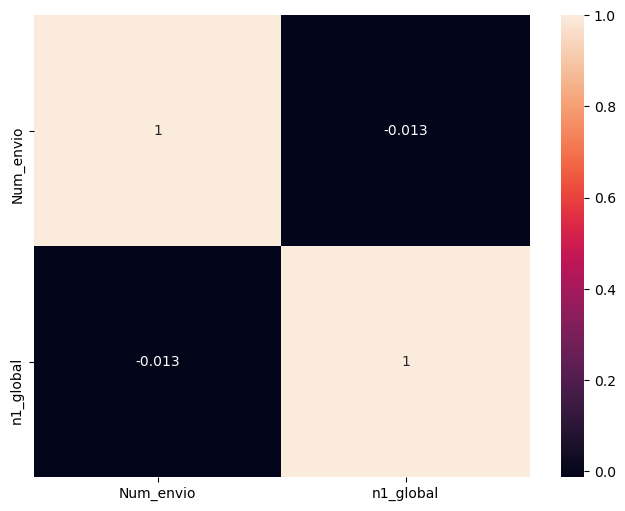

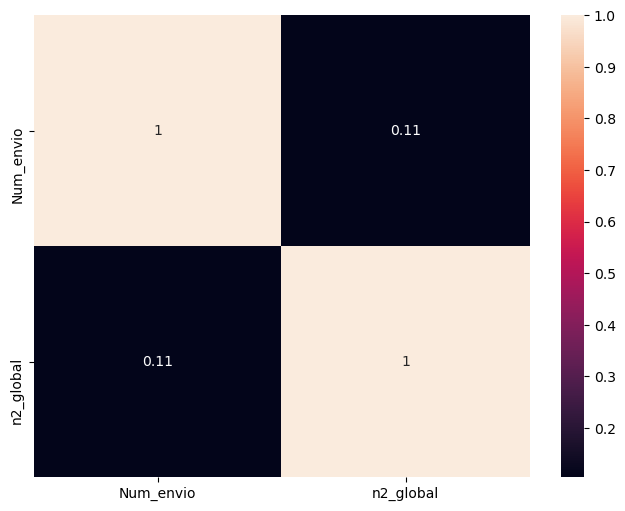

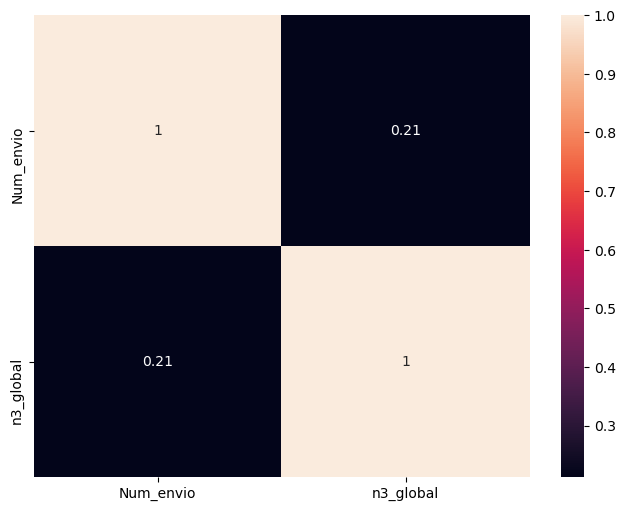

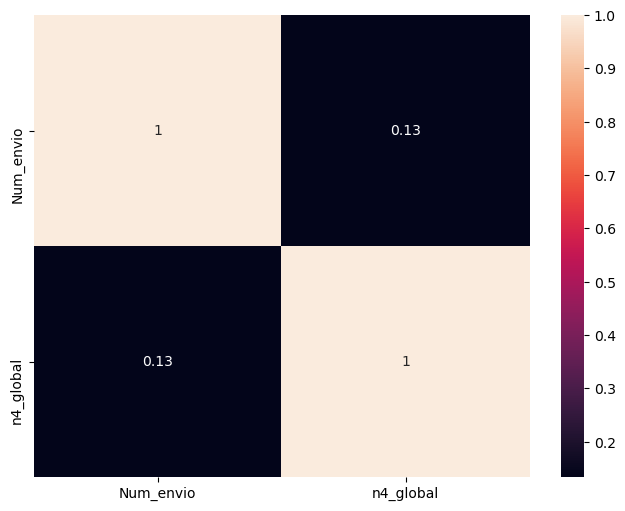

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df1[['Num_envio','n1_global']], annot=True)
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df2[['Num_envio','n2_global']], annot=True)
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df3[['Num_envio','n3_global']], annot=True)
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df4[['Num_envio','n4_global']], annot=True)
plt.show()

In [52]:
columnas=['Num_envio','Asoc_tarea','n1_global','n2_global','n3_global','n4_global','retiroOno']
# df_envio_no_tareas= (df_analisis[(df_analisis['Asoc_tarea']==0) ])
# df_envio_tareas= (df_analisis[(df_analisis['Asoc_tarea']==1) ])
# corr_df_general= df_analisis.corr(method='pearson')
# corr_df_no_tareas = df_envio_no_tareas[columnas].corr(method='pearson')
# corr_df_tareas =df_envio_tareas[columnas].corr(method='pearson')

df_nivel1= (df_analisis[(df_analisis['nivel']==1) & (df_analisis['Asoc_tarea']==0)])
df_nivel2=df_analisis[(df_analisis['nivel']==2) & (df_analisis['Asoc_tarea']==0)]
df_nivel3= df_analisis[(df_analisis['nivel']==3) & (df_analisis['Asoc_tarea']==0)]
df_nivel4=df_analisis[(df_analisis['nivel']==4) & (df_analisis['Asoc_tarea']==0)]
corr_df1= df_nivel1[['Num_envio','n1_global']].corr(method='pearson')
corr_df2= df_nivel2[['Num_envio','n2_global']].corr(method='pearson')
corr_df3= df_nivel3[['Num_envio','n3_global']].corr(method='pearson')
corr_df4= df_nivel4[['Num_envio','n4_global']].corr(method='pearson')

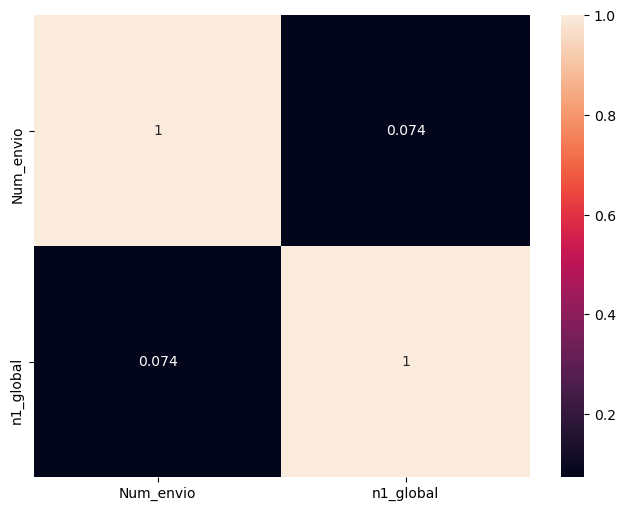

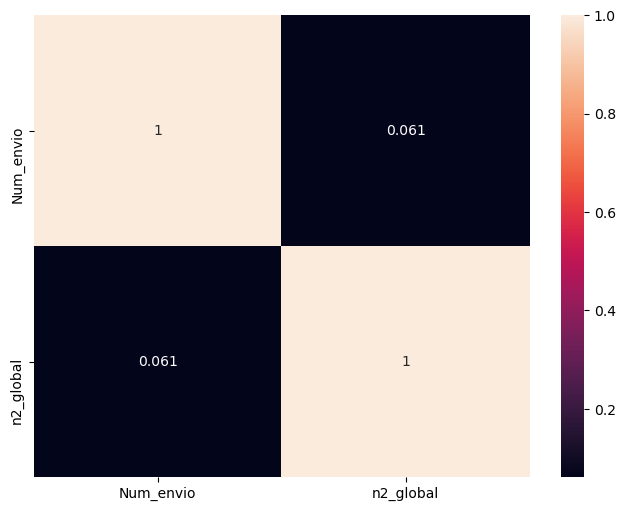

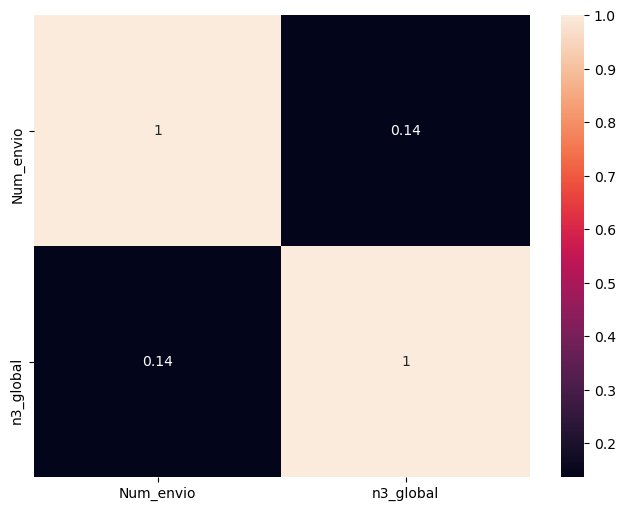

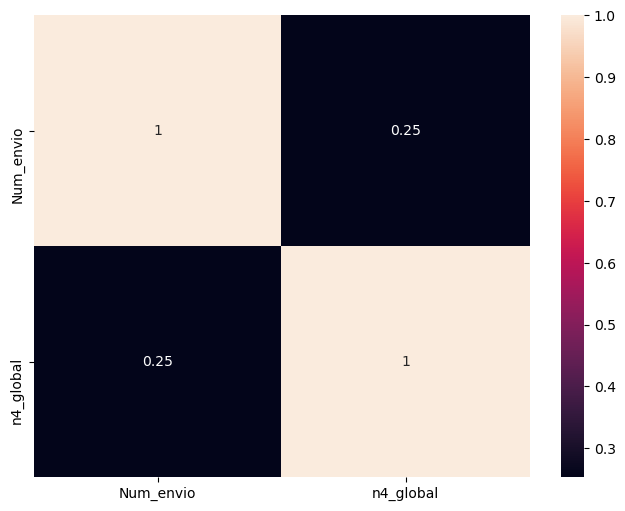

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df1[['Num_envio','n1_global']], annot=True)
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df2[['Num_envio','n2_global']], annot=True)
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df3[['Num_envio','n3_global']], annot=True)
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df4[['Num_envio','n4_global']], annot=True)
plt.show()

# Analisis y Coorrelación por puntos

In [54]:
resultado_estudiante = resultado_estudiante[pd.isna(resultado_estudiante['problema_id'])==False].copy()

In [55]:
resultado_estudiante['problema_id'] = resultado_estudiante['problema_id'].astype(int)
resultado_estudiante['problema_id'] = resultado_estudiante['problema_id'].astype(str)
resultado_estudiante_problemas= pd.merge(resultado_estudiante,problemas,on='problema_id')
resultado_estudiante_problemas

,id,resuelto,primer_intento,puntos,estudiante_id,problema_id,ultimo_intento,ultimo_envio_id,titulo,curso_id,autor_id,dificultad,estado,funcion,retorno_tipo,publico,nivel,ultima_modificacion,nivel_reto
0,65,1,2019-09-09 16:47:13.606744,10,524,117,NaN,136261.0,Área de una habitación,1,362,10,NU,area_habitacion,float,1,1,2019-09-09 16:00:21.955652,B
1,66,1,2019-09-09 17:20:15.104411,10,526,117,NaN,70785.0,Área de una habitación,1,362,10,NU,area_habitacion,float,1,1,2019-09-09 16:00:21.955652,B
2,125,1,2019-09-10 02:53:29.240175,10,529,117,NaN,213.0,Área de una habitación,1,362,10,NU,area_habitacion,float,1,1,2019-09-09 16:00:21.955652,B
3,454,1,2019-09-11 13:13:25.196147,10,523,117,NaN,136910.0,Área de una habitación,1,362,10,NU,area_habitacion,float,1,1,2019-09-09 16:00:21.955652,B
4,455,0,2019-09-11 13:14:57.738138,0,398,117,NaN,247.0,Área de una habitación,1,362,10,NU,area_habitacion,float,1,1,2019-09-09 16:00:21.955652,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135489,133747,0,2022-05-25 19:11:07.847961,0,5737,265,NaN,NaN,Anomalías en fechas de vacunación,1,466,20,NU,mostrar_anomalias,pd.Series,1,4,2021-08-31 12:41:33.247998,M
135490,133749,0,2022-05-25 19:11:07.873423,0,5744,265,NaN,NaN,Anomalías en fechas de vacunación,1,466,20,NU,mostrar_anomalias,pd.Series,1,4,2021-08-31 12:41:33.247998,M
135491,133751,0,2022-05-25 19:11:07.899830,0,5740,265,NaN,NaN,Anomalías en fechas de vacunación,1,466,20,NU,mostrar_anomalias,pd.Series,1,4,2021-08-31 12:41:33.247998,M
135492,133753,0,2022-05-25 19:11:07.925366,0,5728,265,NaN,NaN,Anomalías en fechas de vacunación,1,466,20,NU,mostrar_anomalias,pd.Series,1,4,2021-08-31 12:41:33.247998,M


In [56]:
resultado_estudiante_problemas['Anio'] = (resultado_estudiante_problemas['primer_intento'].apply(conseguir_anio))
resultado_estudiante_problemas['Mes'] = (resultado_estudiante_problemas['primer_intento'].apply(conseguir_mes))
resultado_estudiante_problemas['Dia'] = (resultado_estudiante_problemas['primer_intento'].apply(conseguir_dia))
resultado_estudiante_problemas['Anio'] = resultado_estudiante_problemas['Anio'].astype(int)
resultado_estudiante_problemas['Mes'] = resultado_estudiante_problemas['Mes'].astype(int)
resultado_estudiante_problemas['Dia'] = resultado_estudiante_problemas['Dia'].astype(int)

In [57]:
resultado_estudiante_problemas['semestre'] = np.where((resultado_estudiante_problemas['Anio']==2022) & (resultado_estudiante_problemas['Mes']<6) & (resultado_estudiante_problemas['Mes']>=1),"202210",
                     np.where((resultado_estudiante_problemas['Anio']==2021) & (resultado_estudiante_problemas['Mes']<=12) & (resultado_estudiante_problemas['Mes']>=8),"202120",
                     np.where((resultado_estudiante_problemas['Anio']==2021) & (resultado_estudiante_problemas['Mes']<6) & (resultado_estudiante_problemas['Mes']>=1),"202110",
                     np.where((resultado_estudiante_problemas['Anio']==2020) & (resultado_estudiante_problemas['Mes']<=12) & (resultado_estudiante_problemas['Mes']>=8),"202020",
                     np.where((resultado_estudiante_problemas['Anio']==2020) & (resultado_estudiante_problemas['Mes']<6) & (resultado_estudiante_problemas['Mes']>=1),"202010",
                     np.where((resultado_estudiante_problemas['Anio']==2019) & (resultado_estudiante_problemas['Mes']<=12) & (resultado_estudiante_problemas['Mes']>=8),"201920",
                     np.where((resultado_estudiante_problemas['Anio']==2019)  & (resultado_estudiante_problemas['Mes']<6) & (resultado_estudiante_problemas['Mes']>=1),"201910",
                              
                     np.where((resultado_estudiante_problemas['Anio']==2021)  & (resultado_estudiante_problemas['Mes']<8) & (resultado_estudiante_problemas['Mes']>=6),"202119",
                     np.where((resultado_estudiante_problemas['Anio']==2020)  & (resultado_estudiante_problemas['Mes']<8) & (resultado_estudiante_problemas['Mes']>=6),"202019",
                     np.where((resultado_estudiante_problemas['Anio']==2022)  & (resultado_estudiante_problemas['Mes']<=8) & (resultado_estudiante_problemas['Mes']>=6),"202219","No match date"))))))))))

In [58]:
resultado_estudiante_problemas_mod= resultado_estudiante_problemas.copy()

In [59]:
resultado_estudiante_problemas_mod['estudiante_id'] = resultado_estudiante_problemas_mod['estudiante_id'].astype(str)
resultado_estudiante_problemas_mod['semestre'] = resultado_estudiante_problemas_mod['semestre'].astype(str)

resultado_estudiante_problemas_mod['est_sem_id'] =  resultado_estudiante_problemas_mod['estudiante_id'] + resultado_estudiante_problemas_mod['semestre'] 

In [60]:
resultado_estudiante_problemas_mod.describe()

,id,resuelto,puntos,ultimo_envio_id,curso_id,autor_id,dificultad,publico,nivel,Anio,Mes,Dia
count,135494.000000,135494.000000,135494.000000,100412.000000,135494.0,135494.000000,135494.000000,135494.000000,135494.000000,135494.000000,135494.000000,135494.000000
mean,67852.462618,0.660133,8.171801,149207.084034,1.0,507.922557,17.055515,0.964596,2.375603,2020.728667,5.720903,15.964884
std,39144.991244,0.473666,9.326043,86800.177461,0.0,390.134357,9.097213,0.184799,1.032913,0.779739,3.294150,8.791369
min,65.000000,0.000000,0.000000,181.000000,1.0,362.000000,5.000000,0.000000,1.000000,2019.000000,1.000000,1.000000
25%,33941.250000,0.000000,0.000000,74714.500000,1.0,362.000000,10.000000,1.000000,1.000000,2020.000000,3.000000,8.000000
50%,67886.500000,1.000000,7.000000,148235.500000,1.0,520.000000,15.000000,1.000000,2.000000,2021.000000,5.000000,17.000000
75%,101759.750000,1.000000,12.000000,225333.750000,1.0,522.000000,20.000000,1.000000,3.000000,2021.000000,9.000000,23.000000
max,135633.000000,1.000000,51.000000,300599.000000,1.0,4141.000000,45.000000,1.000000,4.000000,2022.000000,12.000000,31.000000


In [61]:
puntos_por_ejercicio_estudiante=(resultado_estudiante_problemas_mod[['est_sem_id','problema_id','puntos']].groupby(['est_sem_id','problema_id']).sum())
puntos_por_ejercicio_estudiante = puntos_por_ejercicio_estudiante['puntos'].reset_index()
puntos_por_ejercicio_estudiante

,est_sem_id,problema_id,puntos
0,1000202010,129,0
1,1000202010,132,8
2,1000202010,135,0
3,1000202010,138,10
4,1000202010,140,0
...,...,...,...
135306,999202019,211,10
135307,999202019,213,10
135308,999202019,215,8
135309,999202019,217,10


In [62]:
puntos_por_ejercicio_estudiante_mod = pd.merge(puntos_por_ejercicio_estudiante,info_estudiantes_det,on='est_sem_id')

In [63]:
puntos_por_ejercicio_estudiante_mod

,est_sem_id,problema_id,puntos,estudiante_id,programa,generacion_e,riesgo_deca,tipo_riesgo_deca,spadies,n1_global,...,n3_teorico,n4_teorico,n1_ejercicio,n2_ejercicio,n3_ejercicio,n4_ejercicio,retiro,semestre,definitiva_profesor,seccion_id
0,1003202110,117,10,1003,ADMINISTRACION DE EMPRESAS,0,0.0,NaN,NaN,5.07,...,4.3,5.05,5.0,4.7,5.0,4.95,NR,202110,4.74,59.0
1,1003202110,120,2,1003,ADMINISTRACION DE EMPRESAS,0,0.0,NaN,NaN,5.07,...,4.3,5.05,5.0,4.7,5.0,4.95,NR,202110,4.74,59.0
2,1003202110,123,10,1003,ADMINISTRACION DE EMPRESAS,0,0.0,NaN,NaN,5.07,...,4.3,5.05,5.0,4.7,5.0,4.95,NR,202110,4.74,59.0
3,1003202110,126,8,1003,ADMINISTRACION DE EMPRESAS,0,0.0,NaN,NaN,5.07,...,4.3,5.05,5.0,4.7,5.0,4.95,NR,202110,4.74,59.0
4,1003202110,127,0,1003,ADMINISTRACION DE EMPRESAS,0,0.0,NaN,NaN,5.07,...,4.3,5.05,5.0,4.7,5.0,4.95,NR,202110,4.74,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107129,983202010,171,8,983,ING. DE SISTEMAS Y COMPUTACION,0,1.0,PRIM,3.0,4.55,...,3.0,4.05,5.0,4.1,-1.0,4.92,NR,202010,3.69,58.0
107130,983202010,173,8,983,ING. DE SISTEMAS Y COMPUTACION,0,1.0,PRIM,3.0,4.55,...,3.0,4.05,5.0,4.1,-1.0,4.92,NR,202010,3.69,58.0
107131,983202010,178,12,983,ING. DE SISTEMAS Y COMPUTACION,0,1.0,PRIM,3.0,4.55,...,3.0,4.05,5.0,4.1,-1.0,4.92,NR,202010,3.69,58.0
107132,983202010,181,10,983,ING. DE SISTEMAS Y COMPUTACION,0,1.0,PRIM,3.0,4.55,...,3.0,4.05,5.0,4.1,-1.0,4.92,NR,202010,3.69,58.0


In [64]:
puntos_por_ejercicio_estudiante_mod['estudiante_id'] = puntos_por_ejercicio_estudiante_mod['estudiante_id'].astype(int)
puntos_por_ejercicio_estudiante_mod['problema_id'] = puntos_por_ejercicio_estudiante_mod['problema_id'].astype(int)
puntos_por_ejercicio_estudiante_mod['seccion_id'] = puntos_por_ejercicio_estudiante_mod['seccion_id'].astype(int)
puntos_por_ejercicio_estudiante_mod['estudiante_id'] = puntos_por_ejercicio_estudiante_mod['estudiante_id'].astype(str)
puntos_por_ejercicio_estudiante_mod['problema_id'] = puntos_por_ejercicio_estudiante_mod['problema_id'].astype(str)
puntos_por_ejercicio_estudiante_mod['seccion_id'] = puntos_por_ejercicio_estudiante_mod['seccion_id'].astype(str)
puntos_por_ejercicio_estudiante_mod['pr_sec_id'] = puntos_por_ejercicio_estudiante_mod['estudiante_id'] + puntos_por_ejercicio_estudiante_mod['problema_id'] + puntos_por_ejercicio_estudiante_mod['seccion_id']

In [65]:
problemas_tareas_estudiante

,peso,numero_x,problema_id,tarea_id,avance,puntos,estudiante_id,calificacion_tarea,problemas_resueltos,numero_y,fecha_limite,seccion_id,descripcion,pr_sec_id
0,1,1,168,6.0,100.000000,101,524,100,0,1,2019-09-15 04:50:13.000000,44,Tarea,52416844
1,1,1,168,6.0,0.000000,0,532,0,0,1,2019-09-15 04:50:13.000000,44,Tarea,53216844
2,1,1,168,6.0,0.000000,0,525,0,0,1,2019-09-15 04:50:13.000000,44,Tarea,52516844
3,1,1,168,6.0,0.000000,0,528,0,0,1,2019-09-15 04:50:13.000000,44,Tarea,52816844
4,1,1,168,6.0,0.000000,0,530,0,0,1,2019-09-15 04:50:13.000000,44,Tarea,53016844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115845,1,3,214,1758.0,33.333333,0,6277,33,1,5,2022-07-30 04:55:00.000000,278,N4 - Tarea 1,6277214278
115846,1,3,214,1758.0,33.333333,0,6278,33,1,5,2022-07-30 04:55:00.000000,278,N4 - Tarea 1,6278214278
115847,1,3,214,1758.0,66.666667,0,6279,67,2,5,2022-07-30 04:55:00.000000,278,N4 - Tarea 1,6279214278
115848,1,3,214,1758.0,0.000000,0,6280,0,0,5,2022-07-30 04:55:00.000000,278,N4 - Tarea 1,6280214278


In [66]:
problemas_tareas_estudiante_sin_ids=problemas_tareas_estudiante.drop(['problema_id','seccion_id','estudiante_id','puntos'], axis=1)
df_final_puntos = pd.merge(puntos_por_ejercicio_estudiante_mod,problemas_tareas_estudiante_sin_ids,on='pr_sec_id',how='left')

In [67]:
df_final_puntos

,est_sem_id,problema_id,puntos,estudiante_id,programa,generacion_e,riesgo_deca,tipo_riesgo_deca,spadies,n1_global,...,pr_sec_id,peso,numero_x,tarea_id,avance,calificacion_tarea,problemas_resueltos,numero_y,fecha_limite,descripcion
0,1003202110,117,10,1003,ADMINISTRACION DE EMPRESAS,0,0.0,NaN,NaN,5.07,...,100311759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1003202110,120,2,1003,ADMINISTRACION DE EMPRESAS,0,0.0,NaN,NaN,5.07,...,100312059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1003202110,123,10,1003,ADMINISTRACION DE EMPRESAS,0,0.0,NaN,NaN,5.07,...,100312359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003202110,126,8,1003,ADMINISTRACION DE EMPRESAS,0,0.0,NaN,NaN,5.07,...,100312659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1003202110,127,0,1003,ADMINISTRACION DE EMPRESAS,0,0.0,NaN,NaN,5.07,...,100312759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110137,983202010,171,8,983,ING. DE SISTEMAS Y COMPUTACION,0,1.0,PRIM,3.0,4.55,...,98317158,1.0,1.0,222.0,100.0,100.0,0.0,6.0,2020-04-25 04:30:00.000000,N3 - Tarea 1
110138,983202010,173,8,983,ING. DE SISTEMAS Y COMPUTACION,0,1.0,PRIM,3.0,4.55,...,98317358,1.0,3.0,222.0,100.0,100.0,0.0,6.0,2020-04-25 04:30:00.000000,N3 - Tarea 1
110139,983202010,178,12,983,ING. DE SISTEMAS Y COMPUTACION,0,1.0,PRIM,3.0,4.55,...,98317858,1.0,2.0,223.0,100.0,100.0,0.0,7.0,2020-05-02 04:30:00.000000,N3 - Tarea 2
110140,983202010,181,10,983,ING. DE SISTEMAS Y COMPUTACION,0,1.0,PRIM,3.0,4.55,...,98318158,1.0,5.0,223.0,100.0,100.0,0.0,7.0,2020-05-02 04:30:00.000000,N3 - Tarea 2


In [68]:
df_final_puntos['tarea_id'].fillna(value=-1.0, inplace=True)

In [69]:
df_final_puntos['Asoc_tarea'] = np.where(df_final_puntos['tarea_id']!= -1.0,1,0) # 1 = Es Tarea, 0= No es Tarea 

In [70]:
df_final_puntos = pd.merge(df_final_puntos,problemas , on="problema_id")
df_final_puntos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110142 entries, 0 to 110141
Data columns (total 51 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   est_sem_id           110142 non-null  object 
 1   problema_id          110142 non-null  object 
 2   puntos               110142 non-null  int64  
 3   estudiante_id        110142 non-null  object 
 4   programa             109474 non-null  object 
 5   generacion_e         110142 non-null  int64  
 6   riesgo_deca          68063 non-null   float64
 7   tipo_riesgo_deca     31100 non-null   object 
 8   spadies              31092 non-null   float64
 9   n1_global            110142 non-null  float64
 10  n2_global            110142 non-null  float64
 11  n3_global            110142 non-null  float64
 12  n4_global            110142 non-null  float64
 13  n1_practico          110142 non-null  float64
 14  n2_practico          110142 non-null  float64
 15  n3_practico      

In [71]:
df_conteo_sino_tarea=df_final_puntos.groupby(['est_sem_id','nivel','Asoc_tarea']).sum()['puntos']
df_conteo_sino_tarea= df_conteo_sino_tarea.reset_index()
df_conteo_sino_tarea

,est_sem_id,nivel,Asoc_tarea,puntos
0,1003202110,1,0,70
1,1003202110,2,0,14
2,1003202110,3,0,23
3,1009202010,1,1,67
4,1009202010,2,1,60
...,...,...,...,...
21105,982202010,3,1,109
21106,982202010,4,0,0
21107,983202010,1,1,50
21108,983202010,2,1,68


In [72]:
df_analisis = pd.merge(df_conteo_sino_tarea,info_estudiantes_det,on='est_sem_id')
df_analisis

,est_sem_id,nivel,Asoc_tarea,puntos,estudiante_id,programa,generacion_e,riesgo_deca,tipo_riesgo_deca,spadies,...,n3_teorico,n4_teorico,n1_ejercicio,n2_ejercicio,n3_ejercicio,n4_ejercicio,retiro,semestre,definitiva_profesor,seccion_id
0,1003202110,1,0,70,1003,ADMINISTRACION DE EMPRESAS,0,0.0,NaN,NaN,...,4.30,5.05,5.0,4.70,5.00,4.95,NR,202110,4.74,59.0
1,1003202110,2,0,14,1003,ADMINISTRACION DE EMPRESAS,0,0.0,NaN,NaN,...,4.30,5.05,5.0,4.70,5.00,4.95,NR,202110,4.74,59.0
2,1003202110,3,0,23,1003,ADMINISTRACION DE EMPRESAS,0,0.0,NaN,NaN,...,4.30,5.05,5.0,4.70,5.00,4.95,NR,202110,4.74,59.0
3,1009202010,1,1,67,1009,INGENIERIA INDUSTRIAL,0,1.0,PRIM,5.0,...,3.75,3.65,5.0,3.09,4.75,4.96,NR,202010,3.72,60.0
4,1009202010,2,1,60,1009,INGENIERIA INDUSTRIAL,0,1.0,PRIM,5.0,...,3.75,3.65,5.0,3.09,4.75,4.96,NR,202010,3.72,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21105,982202010,3,1,109,982,FISICA,0,1.0,PRIM,5.0,...,4.55,4.15,4.9,3.45,-1.00,4.72,NR,202010,4.34,58.0
21106,982202010,4,0,0,982,FISICA,0,1.0,PRIM,5.0,...,4.55,4.15,4.9,3.45,-1.00,4.72,NR,202010,4.34,58.0
21107,983202010,1,1,50,983,ING. DE SISTEMAS Y COMPUTACION,0,1.0,PRIM,3.0,...,3.00,4.05,5.0,4.10,-1.00,4.92,NR,202010,3.69,58.0
21108,983202010,2,1,68,983,ING. DE SISTEMAS Y COMPUTACION,0,1.0,PRIM,3.0,...,3.00,4.05,5.0,4.10,-1.00,4.92,NR,202010,3.69,58.0


In [73]:
# df_analisis.to_csv("./datos/estudiante_puntos_por_nivel_y_siesono_tarea.csv",index=False)

<AxesSubplot:>

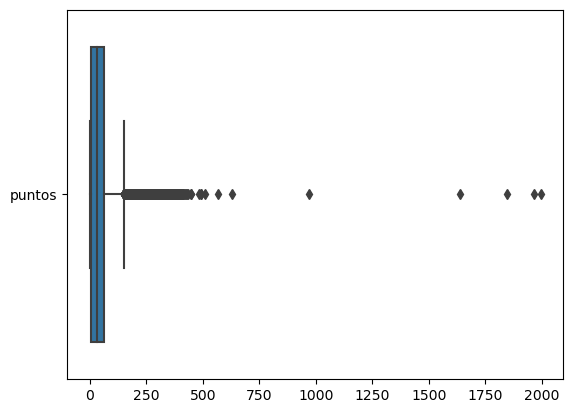

In [74]:
sns.boxplot(data=df_analisis[['puntos']], orient="h")

<AxesSubplot:>

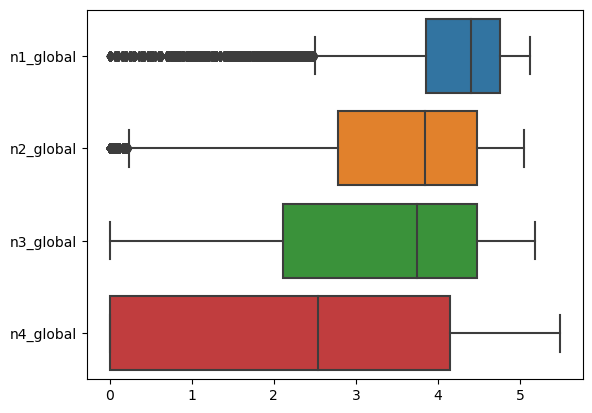

In [75]:
sns.boxplot(data=df_analisis[['n1_global','n2_global','n3_global','n4_global']], orient="h")

In [76]:
# Seleccionamos los no Outliers usando percentiles
per = 95

# Depuración de las anomalías en las columnas.
num_envios = (df_analisis['puntos'] < np.percentile(df_analisis['puntos'] , per))

In [77]:
df_analisis= df_analisis[num_envios].copy()

In [78]:
per_b = 5
n1_global_no_out= (df_analisis['n1_global'] > np.percentile(df_analisis['n1_global'] , per_b))

In [79]:
df_analisis= df_analisis[n1_global_no_out].copy()

<AxesSubplot:>

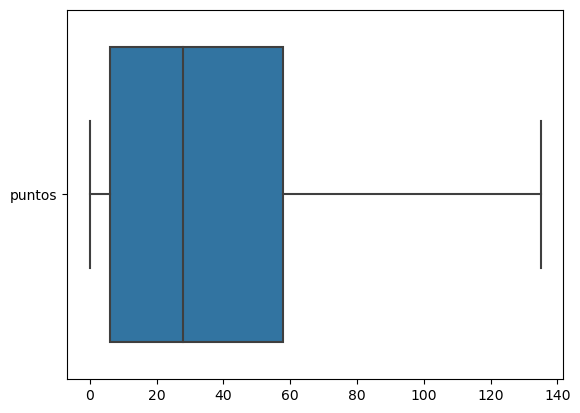

In [80]:
sns.boxplot(data=df_analisis[['puntos']], orient="h")

<AxesSubplot:>

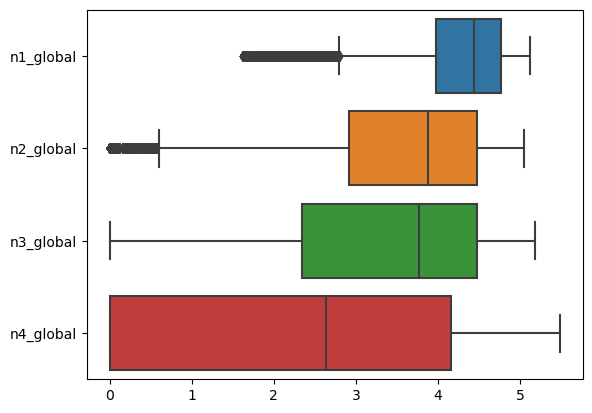

In [81]:
sns.boxplot(data=df_analisis[['n1_global','n2_global','n3_global','n4_global']], orient="h")

In [82]:
df_analisis['retiroOno'] = np.where((df_analisis['retiro']=='NR'),1,0)

In [83]:
columnas=['Num_envio','Asoc_tarea','n1_global','n2_global','n3_global','n4_global','retiroOno']
# df_envio_no_tareas= (df_analisis[(df_analisis['Asoc_tarea']==0) ])
# df_envio_tareas= (df_analisis[(df_analisis['Asoc_tarea']==1) ])
# corr_df_general= df_analisis.corr(method='pearson')
# corr_df_no_tareas = df_envio_no_tareas[columnas].corr(method='pearson')
# corr_df_tareas =df_envio_tareas[columnas].corr(method='pearson')

df_nivel1= df_analisis[(df_analisis['nivel']==1) & (df_analisis['Asoc_tarea']==1)]
df_nivel2= df_analisis[(df_analisis['nivel']==2) & (df_analisis['Asoc_tarea']==1)]
df_nivel3= df_analisis[(df_analisis['nivel']==3) & (df_analisis['Asoc_tarea']==1)]
df_nivel4=df_analisis[(df_analisis['nivel']==4) & (df_analisis['Asoc_tarea']==1)]
corr_df1= df_nivel1[['puntos','n1_global']].corr(method='pearson')
corr_df2= df_nivel2[['puntos','n2_global']].corr(method='pearson')
corr_df3= df_nivel3[['puntos','n3_global']].corr(method='pearson')
corr_df4= df_nivel4[['puntos','n4_global']].corr(method='pearson')

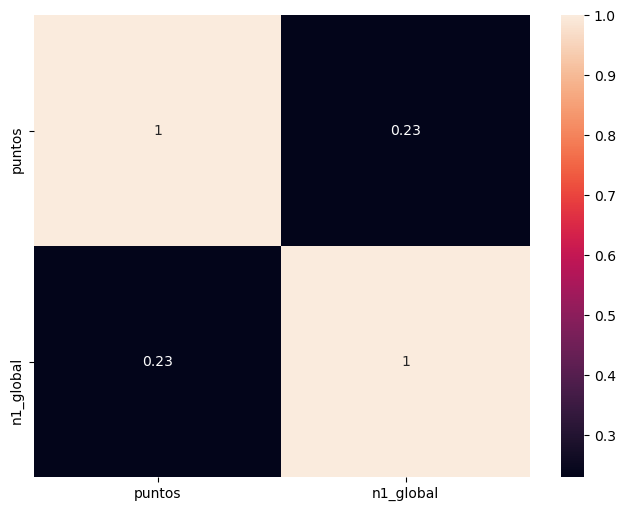

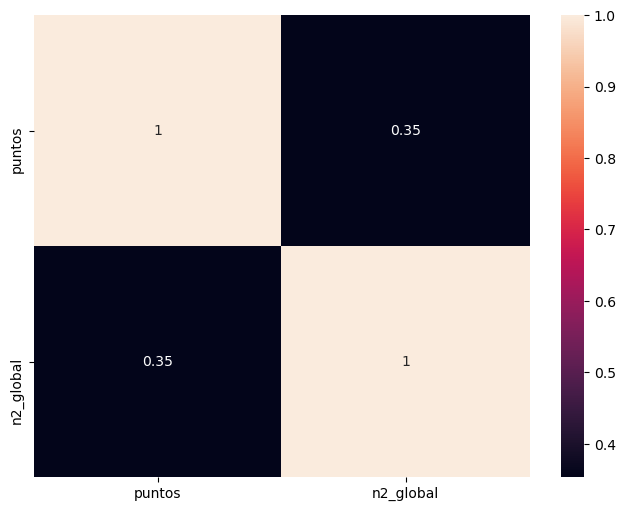

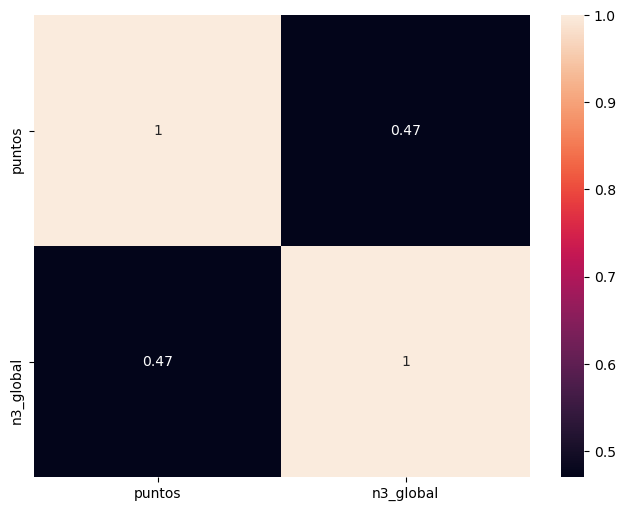

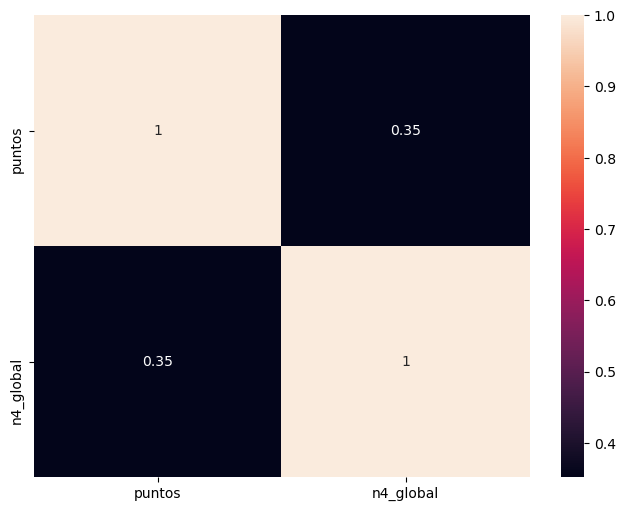

In [84]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df1[['puntos','n1_global']], annot=True)
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df2[['puntos','n2_global']], annot=True)
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df3[['puntos','n3_global']], annot=True)
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df4[['puntos','n4_global']], annot=True)
plt.show()

In [85]:
columnas=['Num_envio','Asoc_tarea','n1_global','n2_global','n3_global','n4_global','retiroOno']
# df_envio_no_tareas= (df_analisis[(df_analisis['Asoc_tarea']==0) ])
# df_envio_tareas= (df_analisis[(df_analisis['Asoc_tarea']==1) ])
# corr_df_general= df_analisis.corr(method='pearson')
# corr_df_no_tareas = df_envio_no_tareas[columnas].corr(method='pearson')
# corr_df_tareas =df_envio_tareas[columnas].corr(method='pearson')

df_nivel1= (df_analisis[(df_analisis['nivel']==1) & (df_analisis['Asoc_tarea']==0)])
df_nivel2=df_analisis[(df_analisis['nivel']==2) & (df_analisis['Asoc_tarea']==0)]
df_nivel3= df_analisis[(df_analisis['nivel']==3) & (df_analisis['Asoc_tarea']==0)]
df_nivel4=df_analisis[(df_analisis['nivel']==4) & (df_analisis['Asoc_tarea']==0)]
corr_df1= df_nivel1[['puntos','n1_global']].corr(method='pearson')
corr_df2= df_nivel2[['puntos','n2_global']].corr(method='pearson')
corr_df3= df_nivel3[['puntos','n3_global']].corr(method='pearson')
corr_df4= df_nivel4[['puntos','n4_global']].corr(method='pearson')

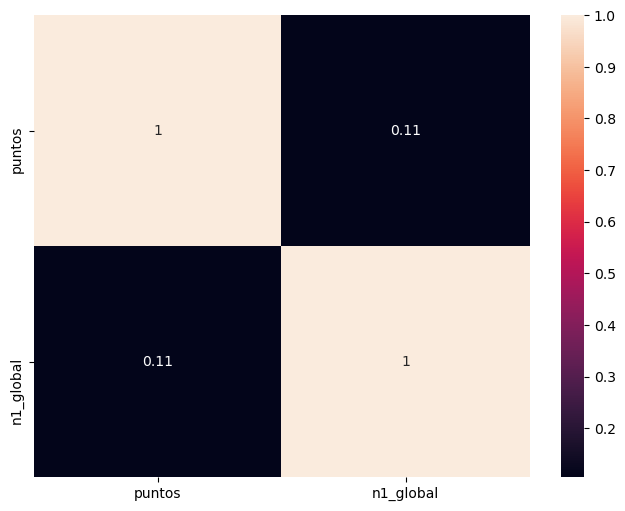

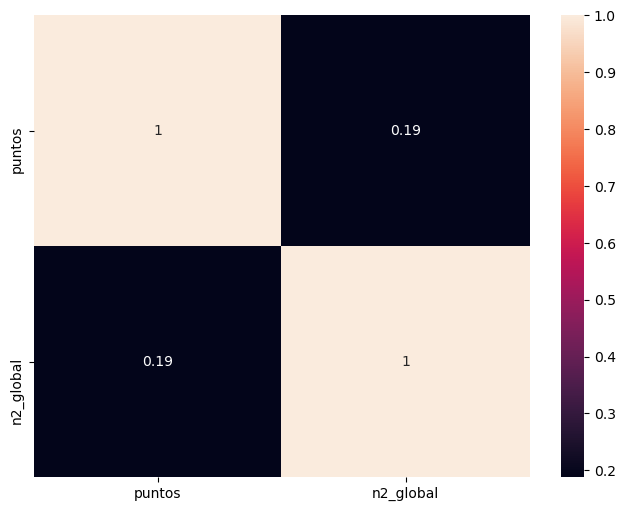

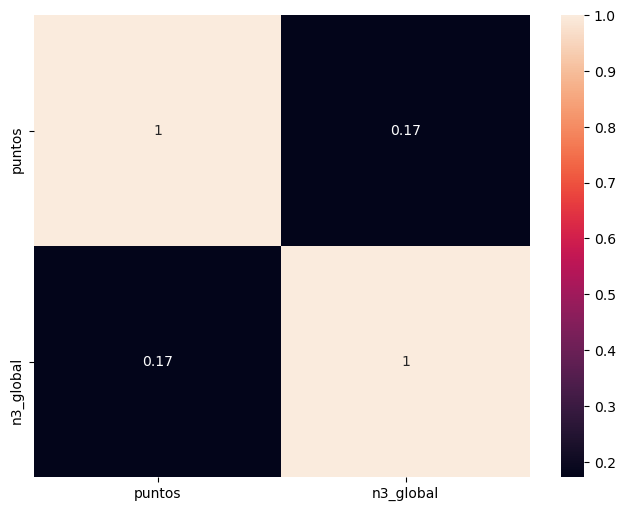

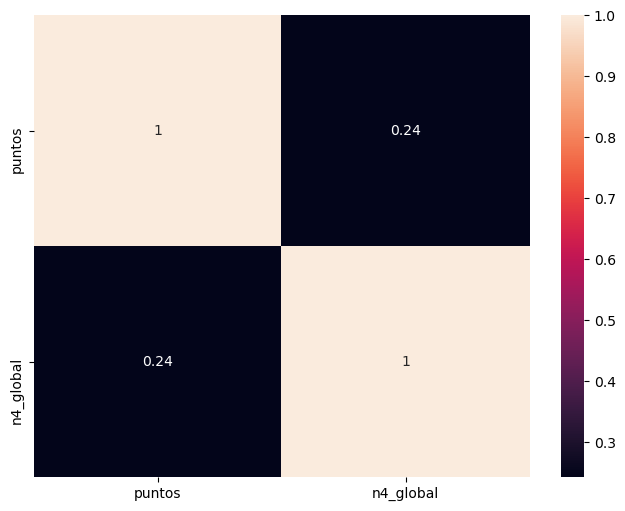

In [86]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df1[['puntos','n1_global']], annot=True)
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df2[['puntos','n2_global']], annot=True)
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df3[['puntos','n3_global']], annot=True)
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df4[['puntos','n4_global']], annot=True)
plt.show()

In [87]:

# columnas=['Num_envio','n1_global','n2_global','n3_global','n4_global','retiroOno']
# df_envio_no_tareas= (df_analisis[(df_analisis['Asoc_tarea']==0) ])
# df_envio_tareas= (df_analisis[(df_analisis['Asoc_tarea']==1) ])
# corr_df_general= df_analisis.corr(method='pearson')
# corr_df_no_tareas = df_envio_no_tareas[columnas].corr(method='pearson')
# corr_df_tareas =df_envio_tareas[columnas].corr(method='pearson')
